#Criando os nomes




In [0]:
import pandas as pd

In [0]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [9]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [10]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [13]:
print('A quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

A quantidade de nomes: 400


In [16]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [0]:
nomes = pd.concat(frames)['nome'].to_frame()

In [19]:
nomes.sample(5)

,nome
24,CLAUDIA
58,ALESSANDRA
138,NEUSA
39,ROSA
24,FABIO


#Incluindo os IDs dos alunos

In [0]:
import numpy as np
np.random.seed(123)

In [23]:
total_alunos = len(nomes)
total_alunos

400

In [0]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [0]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios,total_alunos)

In [0]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [0]:
nomes

# Criando a tabela cursos

In [41]:
!pip3 install html5lib
!pip3 install lxml

In [0]:
import html5lib

In [45]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [46]:
type(cursos)

list

In [0]:
cursos = cursos[0]

In [48]:
type(cursos)

pandas.core.frame.DataFrame

#Alterando o index de cursos

In [0]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [51]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [0]:
total_cursos = len(cursos)

In [0]:
cursos['curso_id'] = np.random.permutation(total_cursos) + 1

In [0]:
cursos = cursos.rename(columns={'curso_id' : 'id'})

In [0]:
cursos['id'] = cursos.index + 1

In [58]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [0]:
cursos = cursos.set_index('id')

In [61]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Matriculando os alinos nos cursos

In [0]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [70]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,3
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,4
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,8
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3


In [72]:
nomes.matriculas.describe()

count    400.000000
mean       2.132500
std        1.583101
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [73]:
 import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


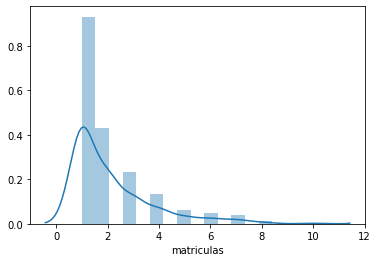

In [74]:
sns.distplot(nomes.matriculas)

In [75]:
nomes.matriculas.value_counts()

1     197
2      91
3      49
4      28
5      13
6      10
7       8
8       3
10      1
Name: matriculas, dtype: int64

#Selecionando cursos

In [0]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [0]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)


matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno','id_cursos'])

In [80]:
matriculas.head()

,id_aluno,id_cursos
0,235,12
1,235,10
2,43,9
3,43,9
4,43,20


In [93]:
matriculas.groupby('id_cursos').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_cursos,,
1,65,Lógica de programação
2,30,Java para Web
3,7,C# para Web
4,34,Ruby on Rails
5,44,Cursos de Python
6,32,PHP com MySql
7,14,.NET para web
8,66,Novas integrações com Java
9,19,TDD com Java


In [94]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,3
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,4


In [0]:
matriculas_por_curso= matriculas.groupby('id_cursos').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

In [96]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_cursos,,
1,65,Lógica de programação
2,30,Java para Web
3,7,C# para Web
4,34,Ruby on Rails
5,44,Cursos de Python


In [97]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_cursos,,
1,65,Lógica de programação
2,30,Java para Web
3,7,C# para Web
4,34,Ruby on Rails
5,44,Cursos de Python
6,32,PHP com MySql
7,14,.NET para web
8,66,Novas integrações com Java
9,19,TDD com Java


#Saída em diferentes formatos

In [98]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_cursos,,
1,65,Lógica de programação
2,30,Java para Web
3,7,C# para Web
4,34,Ruby on Rails
5,44,Cursos de Python


In [0]:
matriculas_por_curso.to_csv('matriculas_por_cursos.csv', index = False)

In [0]:
pd.read_csv('matriculas_por_cursos.csv')

In [0]:
matriculas_json = matriculas_por_curso.to_json()

In [104]:
matriculas_json

'{"quantidade_de_alunos":{"1":65,"2":30,"3":7,"4":34,"5":44,"6":32,"7":14,"8":66,"9":19,"10":57,"11":65,"12":97,"13":8,"14":17,"15":62,"16":84,"17":15,"18":19,"19":75,"20":43},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [0]:
matriculas_html = matriculas_por_curso.to_html()

In [0]:
print(matriculas_html)

# Criando o banco sql


In [108]:
!pip install sqlalchemy

In [0]:
from sqlalchemy import create_engine, MetaData, Table

In [0]:
engine = create_engine('sqlite:///:memory:')

In [112]:
engine

Engine(sqlite:///:memory:)

In [113]:
type(engine)

sqlalchemy.engine.base.Engine

In [0]:
matriculas_por_curso.to_sql('matriculas',engine)

In [115]:
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [0]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [0]:
pd.read_sql(query,engine)

In [0]:
pd.read_sql_table('matriculas',engine, columns=['nome_do_curso','quantidade_de_alunos'])

In [0]:
muitas_matriculas = pd.read_sql_table('matriculas',engine, columns=['nome_do_curso','quantidade_de_alunos'])

In [0]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [0]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

# Nomes dos alunos e alunas nova turma

In [131]:
matriculas

,id_aluno,id_cursos
0,235,12
1,235,10
2,43,9
3,43,9
4,43,20
...,...,...
848,323,11
849,383,19
850,383,4
851,383,16


In [134]:
id_curso = 16
proxima_turma = matriculas.query('id_cursos == {}'.format(id_curso))
proxima_turma

,id_aluno,id_cursos
14,343,16
31,185,16
33,185,16
34,185,16
36,185,16
...,...,...
785,398,16
808,112,16
812,33,16
836,231,16


In [135]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_cursos,nome,dominio,email,matriculas
id_aluno,,,,,
9,16,RENAN,@dominiodoemail.com.br,renan@dominiodoemail.com.br,7
10,16,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,1
12,16,RITA,@servicodoemail.com,rita@servicodoemail.com,6
31,16,VILMA,@servicodoemail.com,vilma@servicodoemail.com,1
33,16,CHARLES,@dominiodoemail.com.br,charles@dominiodoemail.com.br,2
...,...,...,...,...,...
383,16,ALVARO,@servicodoemail.com,alvaro@servicodoemail.com,3
384,16,RENATO,@servicodoemail.com,renato@servicodoemail.com,2
390,16,MARCOS,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,3


In [137]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
9         RENAN
10      MARIANA
12         RITA
31        VILMA
33      CHARLES
         ...   
383      ALVARO
384      RENATO
390      MARCOS
397      LILIAN
398    CRISTIAN
Name: nome, Length: 84, dtype: object

In [139]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
9,RENAN
10,MARIANA
12,RITA
31,VILMA
33,CHARLES
...,...
383,ALVARO
384,RENATO
390,MARCOS


In [140]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [141]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [0]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [0]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

# Excel

In [0]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)